In [124]:
import sys
sys.path.append('../')
import sqlite3
import json
from backtester import *
from fxcmtoken import major_forex_pairs
from sklearn.model_selection import train_test_split

In [125]:
major_forex_pairs

['EUR/USD', 'GBP/USD', 'USD/JPY', 'USD/CHF', 'USD/CAD', 'AUD/USD', 'NZD/USD']

In [126]:
freq = 'm15'
conn = sqlite3.connect(f'../PriceData/PriceData_{freq}.db')
ticker = major_forex_pairs[6]
print(ticker)
data = pd.read_sql(f"SELECT * FROM '{ticker}'", conn, parse_dates=['date'], index_col=['date'])
conn.close()
columns = ['open', 'high', 'low', 'close']
for col in columns:
    data[col] = data[['bid'+col, 'ask'+col]].mean(axis=1)
# display(data.head())
# display(data.tail())
print(data.shape)
# display(data)
test_size = 0.1
train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)
# data = train_data
data = test_data
print(data.shape)
display(data)

NZD/USD
(10000, 13)
(1000, 13)


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close
date,,,,,,,,,,,,,
2021-11-10 20:00:00,0.70624,0.70629,0.70655,0.70612,0.70644,0.70646,0.70673,0.70631,2798,0.706340,0.706640,0.706215,0.706375
2021-11-10 20:15:00,0.70629,0.70651,0.70652,0.70592,0.70646,0.70672,0.70672,0.70611,1693,0.706375,0.706620,0.706015,0.706615
2021-11-10 20:30:00,0.70651,0.70626,0.70655,0.70626,0.70672,0.70646,0.70674,0.70646,1599,0.706615,0.706645,0.706360,0.706360
2021-11-10 20:45:00,0.70626,0.70586,0.70639,0.70585,0.70646,0.70605,0.70657,0.70604,1745,0.706360,0.706480,0.705945,0.705955
2021-11-10 21:00:00,0.70586,0.70555,0.70598,0.70549,0.70605,0.70574,0.70616,0.70568,659,0.705955,0.706070,0.705585,0.705645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25 01:45:00,0.68896,0.68804,0.68896,0.68801,0.68914,0.68822,0.68914,0.68817,1063,0.689050,0.689050,0.688090,0.688130
2021-11-25 02:00:00,0.68804,0.68800,0.68812,0.68766,0.68821,0.68818,0.68829,0.68784,892,0.688125,0.688205,0.687750,0.688090
2021-11-25 02:15:00,0.68799,0.68803,0.68809,0.68790,0.68818,0.68821,0.68826,0.68809,674,0.688085,0.688175,0.687995,0.688120


In [127]:
with open(f'../ta_optimize/json/OPTIMIZE_params_{freq}.json', 'r') as f:
    parameters = json.load(f)
# print(parameters)

In [128]:
# # ADX
# adx_params = parameters['ADX'][ticker]
# adx = ta.trend.ADXIndicator(high=data['high'], low=data['low'], close=data['close'], window=adx_params[0], fillna=False)
# data['adx_pos'] = adx.adx_pos()
# data['adx_neg'] = adx.adx_neg()
# data['adx_diff'] = data['adx_pos'] - data['adx_neg']

# # AO
# ao_params = parameters['AO'][ticker]
# data['ao'] = ta.momentum.awesome_oscillator(high=data['high'], low=data['low'], window1=ao_params[0], window2=ao_params[1], fillna=False)

# # AROON
# aroon_params = parameters['AROON'][ticker]
# aroon = ta.trend.AroonIndicator(close=data['close'], window=aroon_params[0], fillna=False)
# data['aroon_ind'] = aroon.aroon_indicator()

# # BB
# bb_params = parameters['BB'][ticker]
# bb = ta.volatility.BollingerBands(close=data['close'], window=bb_params[0], window_dev=bb_params[1], fillna=False)
# data['bb_high'] = bb.bollinger_hband()
# data['bb_avg'] = bb.bollinger_mavg()
# data['bb_low'] = bb.bollinger_lband()

# # CCI
# data['cci'] = ta.trend.cci(high=data['high'], low=data['low'], close=data['close'], window=parameters['CCI'][ticker], constant=0.015, fillna=False)

# # CMF
# cmf_params = parameters['CMF'][ticker]
# data['cmf'] = ta.volume.chaikin_money_flow(high=data['high'], low=data['low'], close=data['close'],volume=data['tickqty'], 
#                                            window=cmf_params[0], fillna = False)

# # DONCHIAN
# data['donchian_perc'] =  ta.volatility.donchian_channel_pband(high=data['high'], low=data['low'], close=data['close'], 
#                                                               window=parameters['DONCHIAN'][ticker],fillna=False)

# # KELTNER
# keltner_params = parameters['KELTNER'][ticker]
# data['keltner_perc'] =  ta.volatility.keltner_channel_pband(high=data['high'], low=data['low'], close=data['close'],
#                                                             window=keltner_params[0], window_atr=keltner_params[1], 
#                                                             fillna=False, original_version=False)

# MACD
# macd_params = parameters['MACD'][ticker]
# macd = ta.trend.MACD(data['close'], 
#                     window_fast=macd_params[0], 
#                     window_slow=macd_params[1], 
#                     window_sign=macd_params[2], 
#                     fillna=False)
# data['macd'] = macd.macd()
# # self.data['signal_line'] = macd.macd_signal()
# data['macd_hist'] = macd.macd_diff()

# MA
ma_params = parameters['MA'][ticker]
for i, window in enumerate(ma_params[0]):
    if ma_params[1] == 'KAMA':
        data[f'MA_{i}'] = ta.momentum.kama(data['close'], window=window, fillna=False)
    elif ma_params[1] == 'SMA':
        data[f'MA_{i}'] = ta.trend.sma_indicator(data['close'], window=window, fillna=False)
    elif ma_params[1] == 'EMA':
        data[f'MA_{i}'] = ta.trend.ema_indicator(data['close'], window=window, fillna=False)
    
# # MFI
# data['mfi'] = ta.volume.money_flow_index(high=data['high'], low=data['low'], close=data['close'], 
#                                          volume=data['tickqty'], window=parameters['MFI'][ticker], fillna=False)

# # RSI
# data['rsi'] = ta.momentum.rsi(data['close'], window=parameters['RSI'][ticker], fillna=False)

# SO
so_windows = parameters['SO'][ticker]
so = ta.momentum.StochasticOscillator(high=data['high'], low=data['low'], close=data['close'],
                                      window=so_windows[0], smooth_window=so_windows[1], fillna=False)
# data['%K'] = so.stoch()
data['%D'] = so.stoch_signal()

# # STOCHRSI
# stochrsi_params = parameters['STOCHRSI'][ticker]
# data['stochrsi'] = ta.momentum.stochrsi_d(close=data['close'], window=stochrsi_params[0], 
#                                           smooth1=stochrsi_params[1],smooth2=stochrsi_params[2],fillna=False)

# # TRIX
# # data['trix'] = ta.trend.trix(close=data['close'], window=parameters['TRIX'][ticker])

# # TSI
# tsi_params = parameters['TSI'][ticker]
# data['tsi'] = ta.momentum.tsi(close=data['close'], window_slow=tsi_params[0], window_fast=tsi_params[1], fillna=False)

# # WILLIAMR
# data['williamsr'] = ta.momentum.williams_r(high=data['high'], low=data['low'], close=data['close'], 
#                                            lbp=parameters['WILLIAMR'][ticker], fillna=False)

# ICHIMOKU
ichimoku_params = parameters['ICHIMOKU'][ticker]
ichimoku = ta.trend.IchimokuIndicator(high=data['high'], 
                                      low=data['low'], 
                                      visual=True,
                                      window1=ichimoku_params[0], 
                                      window2=ichimoku_params[1], 
                                      window3=ichimoku_params[2])
data['span_a'] = ichimoku.ichimoku_a()
data['span_b'] = ichimoku.ichimoku_b()
data['base'] = ichimoku.ichimoku_base_line()
data['conv'] = ichimoku.ichimoku_conversion_line()

In [129]:
# get signals
data.dropna(axis=0, inplace=True)

# # ADX
# data['adx_signal'] = np.where(data['adx_diff'] > adx_params[1], -1,np.where(data['adx_diff'] < -adx_params[1], 1, np.nan))
# data['adx_signal'] = data['adx_signal'].ffill().fillna(0)

# # AO
# data['ao_signal'] = np.where(data['ao'] > 0, 1,np.where(data['ao'] < 0, -1, 0))

# # AROON
# data['aroon_signal'] = np.where(data['aroon_ind'] > aroon_params[1], 1,np.where(data['aroon_ind'] < -aroon_params[1], -1, np.nan))
# data['aroon_signal'] = data['ao_signal'].ffill().fillna(0)

# # BB
# data['distance'] = data['close'] - data['bb_avg']
# data['bb_signal'] = np.where(data['close'] < data['bb_low'], 1,
#                     np.where(data['close'] > data['bb_high'], -1, 
#                     np.where(data['distance']*data['distance'].shift(1)<0, 0, np.nan)))
# data['bb_signal'] = data['bb_signal'].ffill().fillna(0)

# # CCI
# data['cci_signal'] = np.where(data['cci'] > 200, -1, np.where(data['cci'] < -200, 1, np.nan))
# data['cci_signal'] = data['cci_signal'].ffill().fillna(0)

# # CMF
# data['cmf_signal'] = np.where(data['cmf'] > cmf_params[1], -1,np.where(data['cmf'] < -cmf_params[1], 1, np.nan))
# data['cmf_signal'] = data['cmf_signal'].ffill().fillna(0)

# # DONCHIAN
# data['donchian_signal'] = np.where(data['donchian_perc'] > 0.8, -1, np.where(data['donchian_perc'] < 0.2, 1, np.nan))
# data['donchian_signal'] = data['donchian_signal'].ffill().fillna(0)

# # KELTNER
# data['keltner_signal'] = np.where(data['keltner_perc'] > 1+keltner_params[2], -1, np.where(data['keltner_perc'] < 0-keltner_params[2], 1, np.nan))
# data['keltner_signal'] = data['keltner_signal'].ffill().fillna(0)

# # MACD
# data['macd_signal'] = np.where(np.all([data['macd_hist'] > 0, data['macd'] < 0], axis=0), 1, 
#                                 np.where(np.all([data['macd_hist'] < 0, data['macd'] > 0] , axis=0), -1, 
#                                 np.nan))
# data['macd_signal'] = data['macd_signal'].ffill().fillna(0)

# MA
data['ma_signal'] = np.where(data['MA_0'] > data['MA_1'], 1, np.where(data['MA_1'] > data['MA_0'], -1, 0))  

# # MFI
# data['mfi_signal'] = np.where(data['mfi'] > 80, -1, np.where(data['mfi'] < 20, 1, np.nan))
# data['mfi_signal'] = data['mfi_signal'].ffill().fillna(0)

# # RSI
# data['rsi_signal'] = np.where(data['rsi'] > 70, -1, np.where(data['rsi'] < 30, 1, np.nan))
# data['rsi_signal'] = data['rsi_signal'].ffill().fillna(0)

# SO
data['so_signal'] = np.where(data['%D'] > 80, -1, np.where(data['%D'] < 20, 1, np.nan))
data['so_signal'] = data['so_signal'].ffill().fillna(0)

# # STOCHRSI
# data['stochrsi_signal'] = np.where(data['stochrsi'] > 0.8, -1, np.where(data['stochrsi'] < 0.2, 1, np.nan))
# data['stochrsi_signal'] = data['stochrsi_signal'].ffill().fillna(0)

# # TRIX
# # data['trix_signal'] = np.where(data['trix'] > 0, 1, np.where(data['trix'] < 0, -1, 0))

# # TSI
# data['tsi_signal'] = np.where(data['tsi'] > tsi_params[2], -1, np.where(data['tsi'] < -tsi_params[2], 1, np.nan))
# data['tsi_signal'] = data['tsi_signal'].ffill().fillna(0)

# # WILLIAMR
# data['williamr_signal'] = np.where(data['williamsr'] > -20, -1,np.where(data['williamsr'] < -80, 1, np.nan))
# data['williamr_signal'] = data['williamr_signal'].ffill().fillna(0)

# ICHIMOKU
data['ichimoku_signal'] = np.where(np.all([data['close'] > data[['span_a', 'span_b']].max(axis=1), 
                                           data['conv'] > data['base']], axis=0), 1,
                          np.where(np.all([data['close'] < data[['span_a', 'span_b']].min(axis=1), 
                                           data['conv'] < data['base']], axis=0), -1, np.nan))
data['ichimoku_signal'] = data['ichimoku_signal'].ffill().fillna(0)

In [130]:
print(data.shape)

(922, 23)


In [131]:
signal_list = [
#                'adx_signal', 
#                'ao_signal', 
#                'aroon_signal',
#                'bb_signal',
#                'cci_signal',
#                'cmf_signal',
#                'donchian_signal',
#                'keltner_signal',
#                'macd_signal',
               'ma_signal',
#                'mfi_signal',
#                'rsi_signal',
               'so_signal',
#                'stochrsi_signal',
            #    'trix_signal',
#                'tsi_signal',
#                'williamr_signal',
                'ichimoku_signal'
                ]

signals = data[signal_list].mode(axis=1)[0]

In [132]:
signals

date
2021-11-11 15:30:00    0.0
2021-11-11 15:45:00    0.0
2021-11-11 16:00:00    0.0
2021-11-11 16:15:00    0.0
2021-11-11 16:30:00    0.0
                      ... 
2021-11-25 01:45:00    1.0
2021-11-25 02:00:00    1.0
2021-11-25 02:15:00    1.0
2021-11-25 02:30:00    1.0
2021-11-25 02:45:00    1.0
Name: 0, Length: 922, dtype: float64

In [133]:
print('*** Positions ***')
print(signals.value_counts())
print('-'*50)
print('*** Trades ***')
print(signals.diff(1).apply(np.abs).value_counts())

*** Positions ***
-1.0    528
 1.0    377
 0.0     17
Name: 0, dtype: int64
--------------------------------------------------
*** Trades ***
0.0    909
2.0     11
1.0      1
Name: 0, dtype: int64


  0%|          | 0/921 [00:00<?, ?it/s]

*** NZD/USD ***


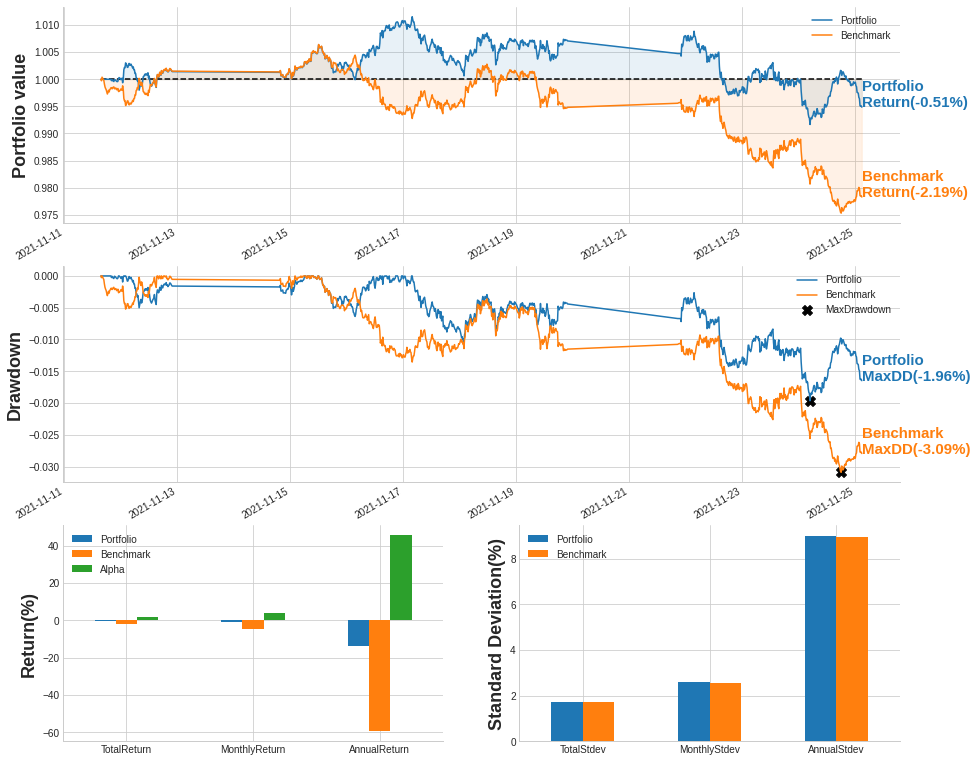

----------------------------------------------------------------------
Data length: |13 days 11:15:00|
Data range from |2021-11-11 15:30:00| to |2021-11-25 02:45:00|
----------------------------------------------------------------------
***** Portfolio Returns in percentage(%) *****
╒═══════════════╤═════════════╤═════════════╤═════════╕
│               │   Portfolio │   Benchmark │   Alpha │
╞═══════════════╪═════════════╪═════════════╪═════════╡
│ TotalReturn   │      -0.516 │      -2.197 │   1.681 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ MonthlyReturn │      -1.148 │      -4.893 │   3.744 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ AnnualReturn  │     -13.971 │     -59.527 │  45.556 │
╘═══════════════╧═════════════╧═════════════╧═════════╛
***** Portfolio Standard Deviation in percentage(%) *****
╒══════════════╤═════════════╤═════════════╕
│              │   Portfolio │   Benchmark │
╞══════════════╪═════════════╪═════════════╡
│ TotalStdev   │   

In [134]:
backtester = IterativeBacktester(data=data, freq=freq, signals=signals)
backtester.backtest(leave=False)
print(f"*** {ticker} ***")
backtester.results()

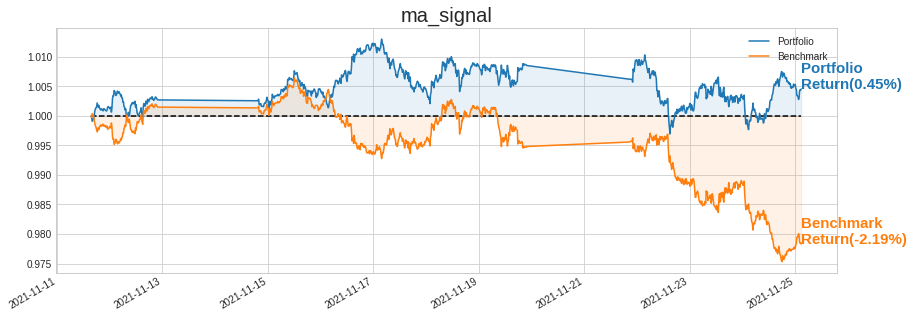

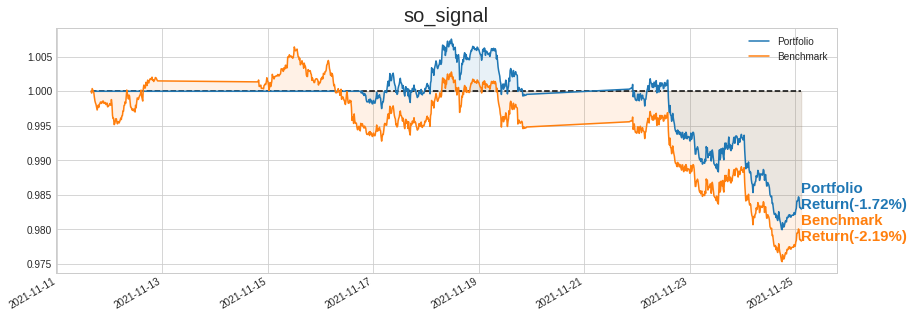

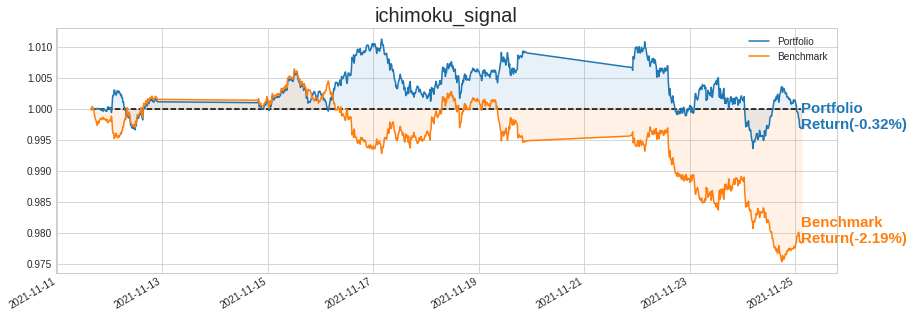

In [135]:
for sign in signal_list:
    backtest = IterativeBacktester(data, data[sign], freq)
    backtest.backtest(progress_bar=False)
    # print(sign)
    backtest.portfolio_df[['Portfolio', 'Benchmark']].plot(color=['tab:blue', 'tab:orange'], xlabel='', figsize=(14,5))
    plt.title(sign, fontsize=20)
    plt.hlines(backtest.init_money, xmin=backtest.portfolio_df.index[0], xmax=backtest.portfolio_df.index[-1], color='k', linestyle='--')
    plt.fill_between(x=backtest.portfolio_df.index, y1=backtest.portfolio_df['Portfolio'], y2=backtest.init_money, color='tab:blue', alpha=0.1)
    plt.fill_between(x=backtest.portfolio_df.index, y1=backtest.portfolio_df['Benchmark'], y2=backtest.init_money, color='tab:orange', alpha=0.1)
    plt.text(backtest.portfolio_df.index[-1], backtest.portfolio_df['Portfolio'][-1], f"Portfolio\nReturn({backtest.portfolio_df['PortfolioReturns'].sum()*100:.2f}%)", color="tab:blue", fontsize=15, fontweight="heavy")
    plt.text(backtest.portfolio_df.index[-1], backtest.portfolio_df['Benchmark'][-1], f"Benchmark\nReturn({backtest.portfolio_df['BenchmarkReturns'].sum()*100:.2f}%)", color="tab:orange", fontsize=15, fontweight="heavy")